## Tweeter Tweets Scrapping for Amazon ##

In [1]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import neattext as nt
import neattext.functions as nfx
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
# using snscrape for scrapping our tweets.

query = "Amazon"
tweets = []
limit = 1000 # as mentioned in problem statement.

In [3]:
# setting limit to 1000 as mentioned in problem statement.


for tweet in sntwitter.TwitterSearchScraper(query).get_items():

    #print(vars(tweet))
    #break

    if len(tweets) == limit:
        break
    else:
        tweets.append([tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.user.username, tweet.content])
        # selecting our features based on which we will analyze the tweets

In [4]:
# selecting most likely to be used features for analysis.

df = pd.DataFrame(tweets, columns=['Date', "Number of Likes","Source of Tweet",'User', 'Tweet'])
print(df)

                         Date  Number of Likes          Source of Tweet  \
0   2022-10-28 06:09:15+00:00                0          Twitter Web App   
1   2022-10-28 06:09:15+00:00                0          Twitter Web App   
2   2022-10-28 06:09:15+00:00                0  あに特製 量子乱数(本当)ツイート術式 肆ノ型   
3   2022-10-28 06:09:13+00:00                0       Twitter for iPhone   
4   2022-10-28 06:09:13+00:00                0       Twitter for iPhone   
..                        ...              ...                      ...   
995 2022-10-28 06:02:24+00:00                0        EcoBiz-1_Info_App   
996 2022-10-28 06:02:23+00:00                0                tokyocool   
997 2022-10-28 06:02:23+00:00                0              collectbook   
998 2022-10-28 06:02:23+00:00                0          Twitter Web App   
999 2022-10-28 06:02:22+00:00                0                    ぱぱらっち   

                User                                              Tweet  
0       lilybylauren  @ma

In [5]:
print('length of data is', len(df))
print('shape of data is', df. shape)

length of data is 1000
shape of data is (1000, 5)


In [6]:
print("Data Info")
print(df.info())
print("\n")
print("DataTypes")
print(df.dtypes)

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Date             1000 non-null   datetime64[ns, UTC]
 1   Number of Likes  1000 non-null   int64              
 2   Source of Tweet  1000 non-null   object             
 3   User             1000 non-null   object             
 4   Tweet            1000 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 39.2+ KB
None


DataTypes
Date               datetime64[ns, UTC]
Number of Likes                  int64
Source of Tweet                 object
User                            object
Tweet                           object
dtype: object


In [7]:
## checking for null
np.sum(df.isnull().any(axis=1))

0

In [8]:
# Checking random tweets how they are presented 
df.iloc[5]['Tweet']

'調査兵団資料館 ATC サンシャイン60展望台 限定  進撃の巨人 ビニールマスコット  調査兵団 非売品 リヴァイ 兵長 マスコット https://t.co/g429I0lgQP amazonさんから'

# Data Preprocessing

### Cleaning the tweets

Removing using handles and mentions \
Removing Hashtags \
Removing stopwords \
Removing special character
Removing punctuations

In [9]:
# Methods/ Attributes of nt
dir(nt)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [10]:
# Methods/ Attributes of nfx

dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

## Text cleaning 
### For purpouse of this test and save compute resource I'll run it on a single text, this can be looped and applied to the entire dataset we have

### 2 methods used

In [24]:
#str = df.iloc[320]['Tweet']
#The above takes the tweet from realtime but it changes every minute so to have the desired string under consideration we are setting it mannually.
str1 = 'TWO PC SOLAR FLASHLIGHTS  BIG PRICE DROP  NO CODE @user123 @meme12  https://t.co/7uvMkfHFpc  ⭐️  PROMO CAN END AT ANY TIME (AD) #amazon #buying #sales  As an Amazon Associate, I may earn from qualifying pur\n\n More deals at https://t.co/qPrTtMFzqN https://t.co/g7rPb13zf9'

In [25]:
# 1st method: using Textframe

docx = nt.TextFrame(str1)
docx.describe()

Key      Value          
Length  : 270            
vowels  : 61             
consonants: 129            
stopwords: 12             
punctuations: 20             
special_char: 23             
tokens(whitespace): 38             
tokens(words): 46             


In [26]:
# reviewing the first 10 words
print(docx.head(10))
print(docx.tail(10))

TWO PC SOL
g7rPb13zf9


In [27]:
# Now we will remove stop words.

docx.remove_stopwords().text

'PC SOLAR FLASHLIGHTS BIG PRICE DROP CODE @user123 @meme12 https://t.co/7uvMkfHFpc ⭐️ PROMO END TIME (AD) #amazon #buying #sales Amazon Associate, earn qualifying pur deals https://t.co/qPrTtMFzqN https://t.co/g7rPb13zf9'

In [28]:
# Now we will remove Punctuations

print(docx.remove_puncts(most_common=True).text)
print()
print(docx.remove_puncts(most_common=False).text)

PC SOLAR FLASHLIGHTS BIG PRICE DROP CODE @user123 @meme12 https://tco/7uvMkfHFpc ⭐️ PROMO END TIME (AD) #amazon #buying #sales Amazon Associate earn qualifying pur deals https://tco/qPrTtMFzqN https://tco/g7rPb13zf9

PC SOLAR FLASHLIGHTS BIG PRICE DROP CODE user123 meme12 httpstco7uvMkfHFpc ⭐️ PROMO END TIME AD amazon buying sales Amazon Associate earn qualifying pur deals httpstcoqPrTtMFzqN httpstcog7rPb13zf9


In [29]:
## 2nd method: removing userhandles / mentions / hastags

print(nfx.remove_userhandles(str1)) 
print(nfx.remove_hashtags(str1))
print(nfx.remove_special_characters(str1))

TWO PC SOLAR FLASHLIGHTS  BIG PRICE DROP  NO CODE      https://t.co/7uvMkfHFpc  ⭐️  PROMO CAN END AT ANY TIME (AD) #amazon #buying #sales  As an Amazon Associate, I may earn from qualifying pur

 More deals at https://t.co/qPrTtMFzqN https://t.co/g7rPb13zf9
TWO PC SOLAR FLASHLIGHTS  BIG PRICE DROP  NO CODE @user123 @meme12  https://t.co/7uvMkfHFpc  ⭐️  PROMO CAN END AT ANY TIME (AD)        As an Amazon Associate, I may earn from qualifying pur

 More deals at https://t.co/qPrTtMFzqN https://t.co/g7rPb13zf9
TWO PC SOLAR FLASHLIGHTS  BIG PRICE DROP  NO CODE user123 meme12  httpstco7uvMkfHFpc    PROMO CAN END AT ANY TIME AD amazon buying sales  As an Amazon Associate I may earn from qualifying pur More deals at httpstcoqPrTtMFzqN httpstcog7rPb13zf9


In [30]:
## remove stopwords

str1 = nfx.remove_stopwords(docx.text)

In [31]:
str1 = nfx.clean_text(str1)
str1

'pc solar flashlights big price drop code user123 meme12 httpstco7uvmkfhfpc promo end time ad amazon buying sales amazon associate earn qualifying pur deals httpstcoqprttmfzqn httpstcog7rpb13zf9'

## Text Extracting

### Tokenization

In [32]:
from nltk.tokenize import word_tokenize
str2 = word_tokenize(str1)
str2

['pc',
 'solar',
 'flashlights',
 'big',
 'price',
 'drop',
 'code',
 'user123',
 'meme12',
 'httpstco7uvmkfhfpc',
 'promo',
 'end',
 'time',
 'ad',
 'amazon',
 'buying',
 'sales',
 'amazon',
 'associate',
 'earn',
 'qualifying',
 'pur',
 'deals',
 'httpstcoqprttmfzqn',
 'httpstcog7rpb13zf9']

## Stemming

In [33]:
import nltk
st = nltk.PorterStemmer()
#str3= st.stem(str2)
#str3

stemstr=[]
for w in str2:
    stemstr.append(st.stem(w))
    #print(w, " : ", lrt)
    

print(stemstr)

['pc', 'solar', 'flashlight', 'big', 'price', 'drop', 'code', 'user123', 'meme12', 'httpstco7uvmkfhfpc', 'promo', 'end', 'time', 'ad', 'amazon', 'buy', 'sale', 'amazon', 'associ', 'earn', 'qualifi', 'pur', 'deal', 'httpstcoqprttmfzqn', 'httpstcog7rpb13zf9']


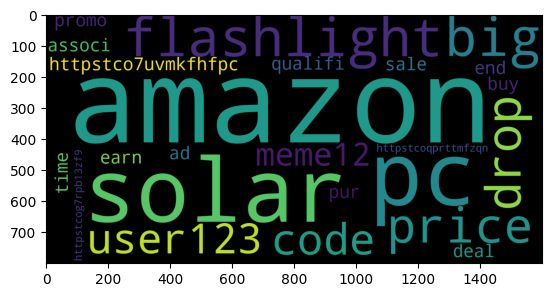

In [34]:
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(stemstr))
plt.imshow(wc)

## After this comes the analysis part where we can perform sentiment analysis and other pattern discovery.